In [27]:
import numpy as np
import scipy 
import matplotlib as mlp
import matplotlib.pyplot as plt 


def read(stderr_file):
    with open(stderr_file, "r") as err:
        stderr_content = err.read()
        # 在这里对 stderr_content 进行处理
        sss = stderr_content.split('\n')[3:-2]
        results = {'time': [],'iteration': [],'value': []}
        for line in sss:
            parts = line.strip().split()
            time = float(parts[1])
            iteration = int(parts[-2])
            value = float(parts[-1])
            results['time'].append(time)
            results['iteration'].append(1+iteration)
            results['value'].append(value)
    return results
def draw(p,N):
    result_file = f'./Order_%d/rho_T_1_N_%d.txt'%(p,N)
    rorder_file = f'./logging_Diric4_%d_%d_rel1E8_stdout.txt'%(p,N)
    data = np.loadtxt(result_file)
    x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = data.T

    plt.figure(figsize=(7,3.2),dpi=200)

    plt.subplot(1,2,1)
    plt.tripcolor(x,y,eh,cmap='jet')
    plt.colorbar()
    plt.xticks(np.linspace(0,1,6))
    plt.yticks(np.linspace(0,1,6))
    plt.xticks(np.linspace(0,1,11),minor=True)
    plt.yticks(np.linspace(0,1,11),minor=True)
    plt.grid(which='both')
    plt.title(r'$E_h(t=\infty)$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

    plt.subplot(1,2,2)
    plt.tripcolor(x,y,eh-es,cmap='jet')
    plt.colorbar()
    plt.xticks(np.linspace(0,1,6))
    plt.yticks(np.linspace(0,1,6))
    plt.xticks(np.linspace(0,1,11),minor=True)
    plt.yticks(np.linspace(0,1,11),minor=True)
    plt.grid(which='both')
    plt.title(r'$E_h(t=\infty)-E(t=\infty)$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

    plt.suptitle(r'Error of Energy, $\|E_h-E\|/\|E\|$=%.2e'%(
    np.loadtxt(rorder_file)[5]))
    plt.tight_layout()
    plt.show()

In [50]:
!g++ ../PoiseuilleBatch3.cpp -o PoiseuilleBatch3 -fopenmp -mfma -mavx2 -O3 -g -I../
# -march=skylake -mtune=skylake -flto=8 -fomit-frame-pointer -funroll-loops -fno-math-errno -ffast-math 

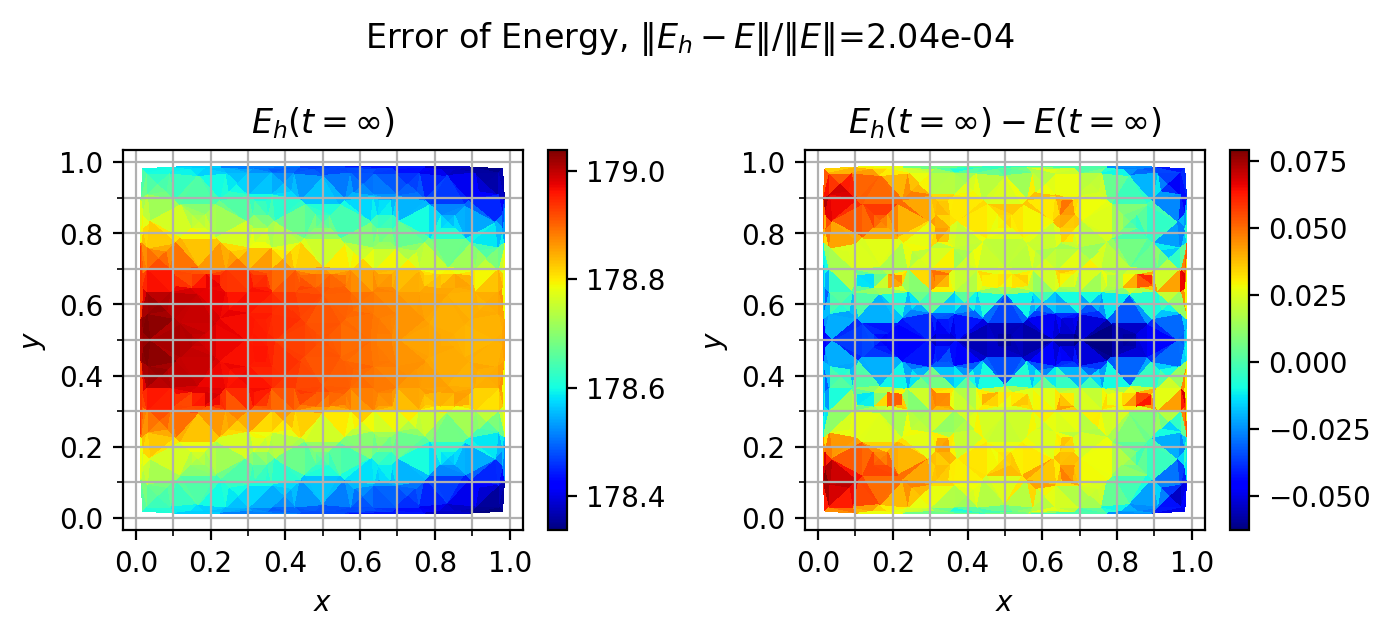

2.253730058670044 [3] [0.000203703]


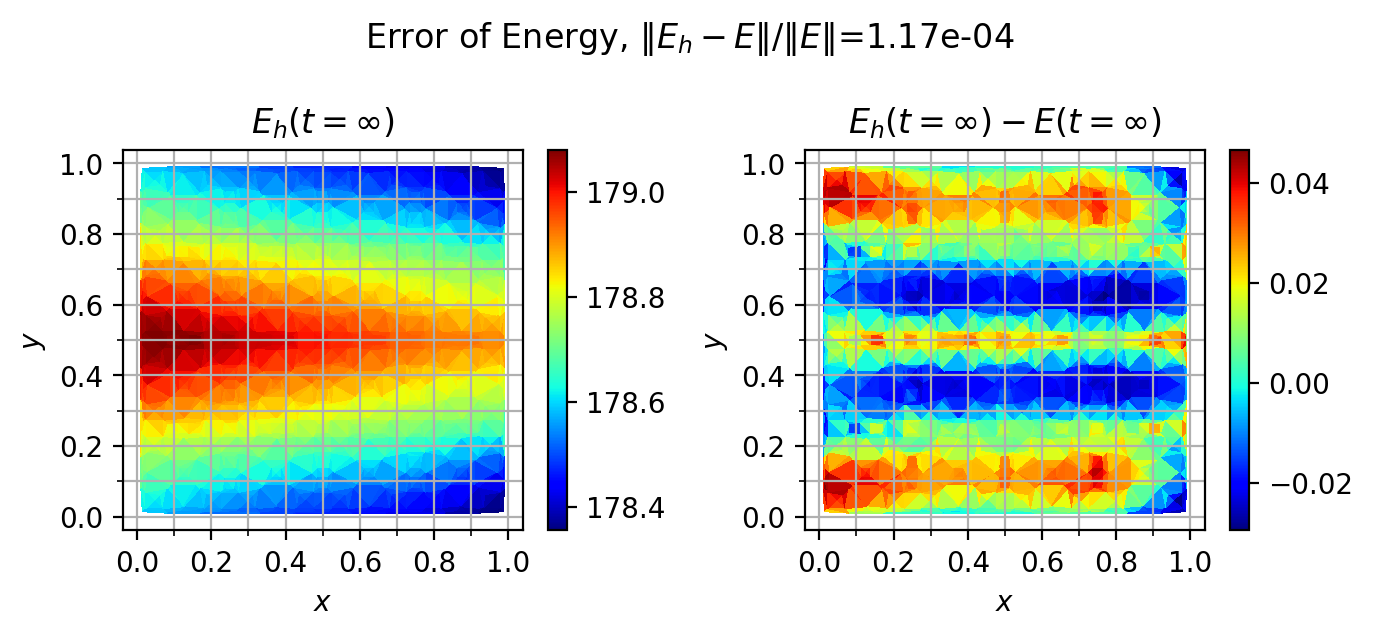

6.711748123168945 [3, 4] [0.000203703, 0.000117203]
[-1.92141127]


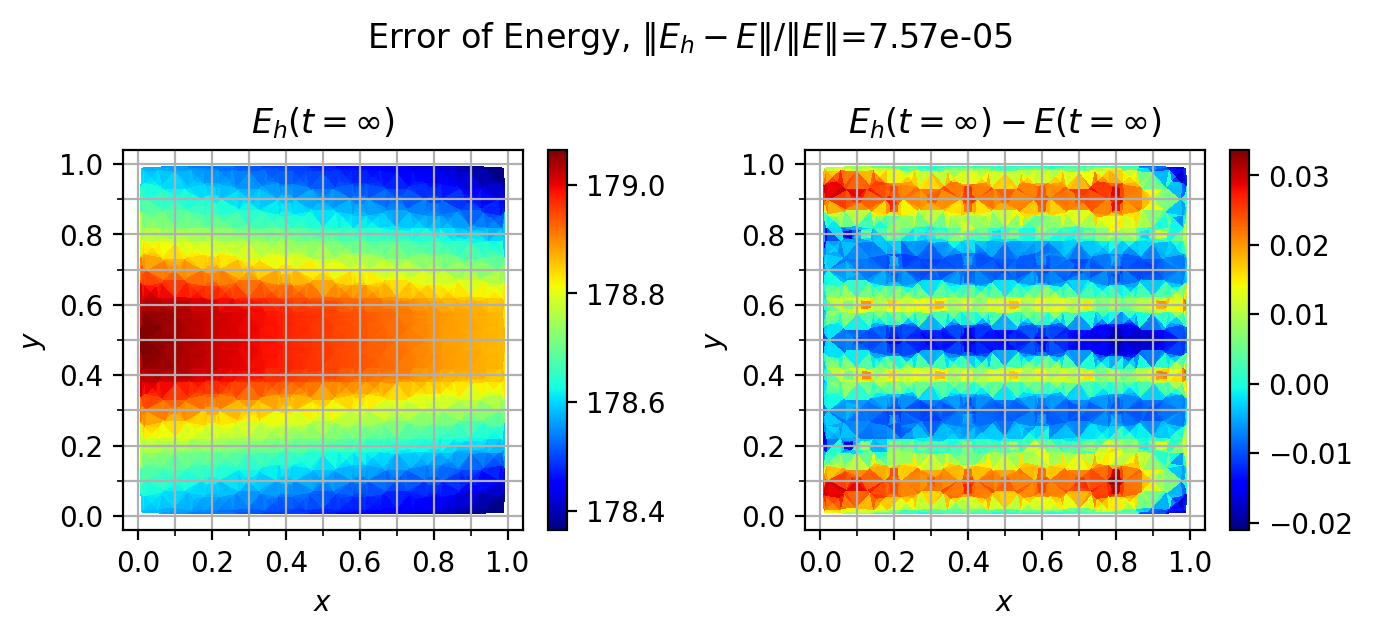

13.523464679718018 [3, 4, 5] [0.000203703, 0.000117203, 7.56837e-05]
[-1.92141127 -1.95992516]


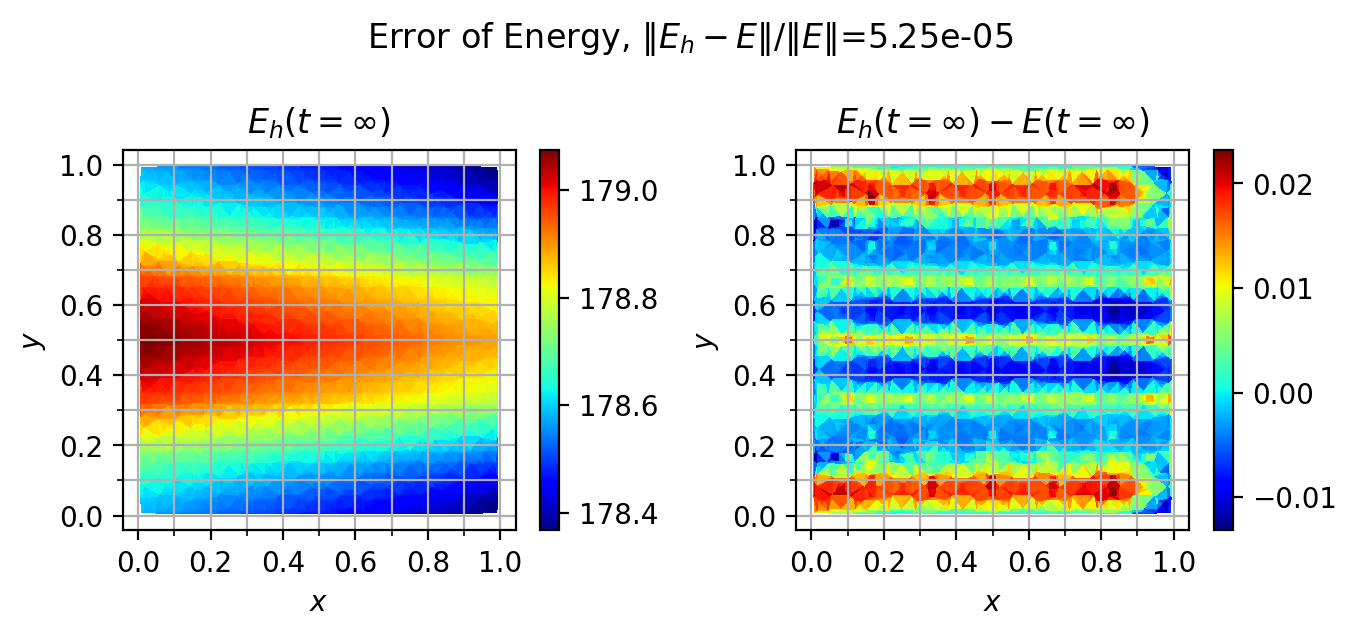

22.683852672576904 [3, 4, 5, 6] [0.000203703, 0.000117203, 7.56837e-05, 5.24637e-05]
[-1.92141127 -1.95992516 -2.00986278]


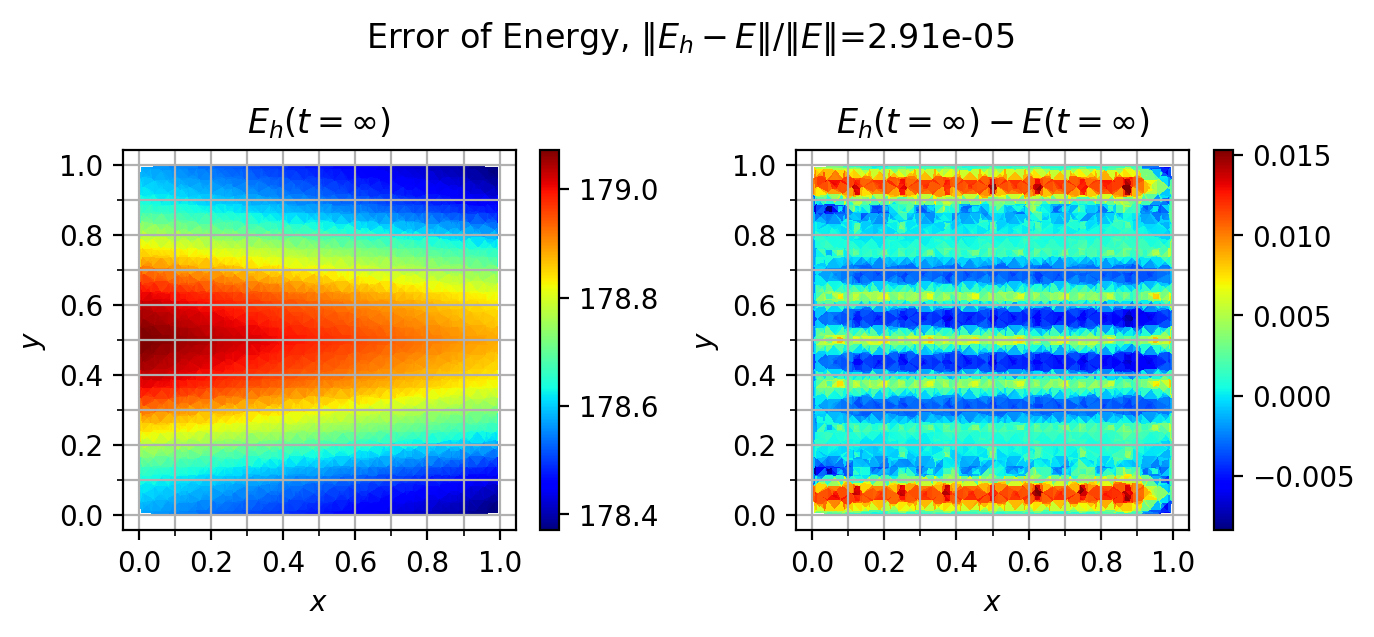

39.91682696342468 [3, 4, 5, 6, 8] [0.000203703, 0.000117203, 7.56837e-05, 5.24637e-05, 2.90897e-05]
[-1.92141127 -1.95992516 -2.00986278 -2.04996209]


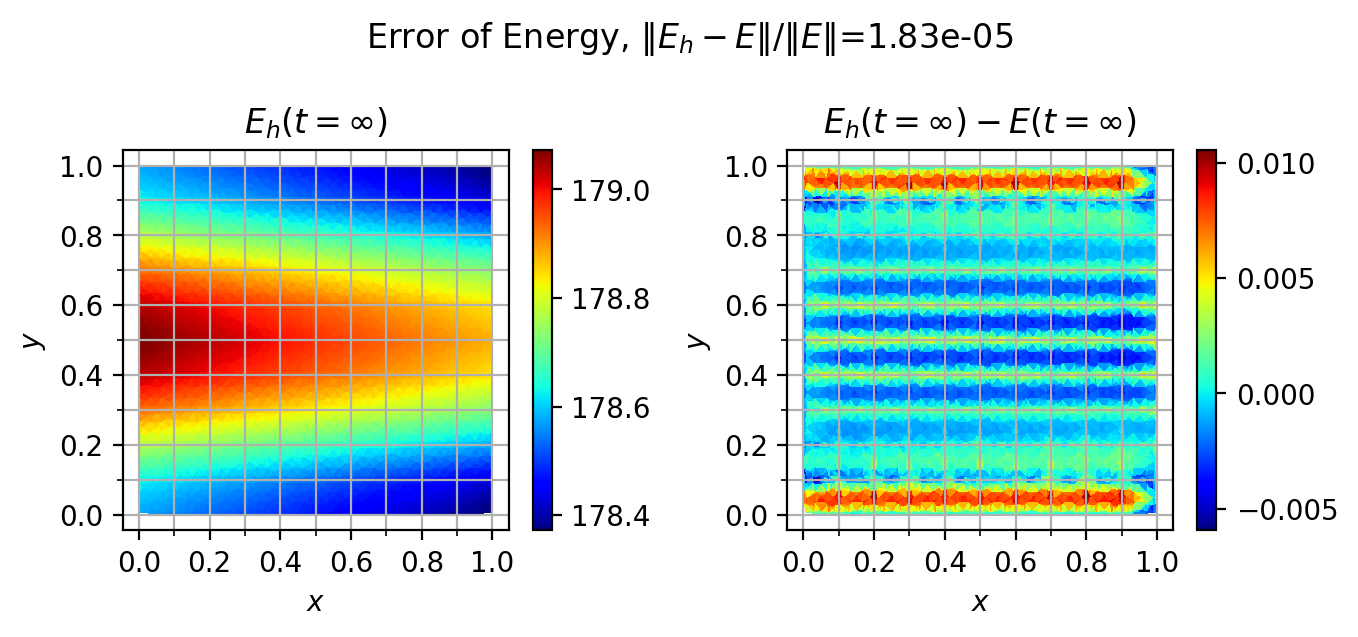

78.08450126647949 [3, 4, 5, 6, 8, 10] [0.000203703, 0.000117203, 7.56837e-05, 5.24637e-05, 2.90897e-05, 1.83185e-05]
[-1.92141127 -1.95992516 -2.00986278 -2.04996209 -2.07253438]


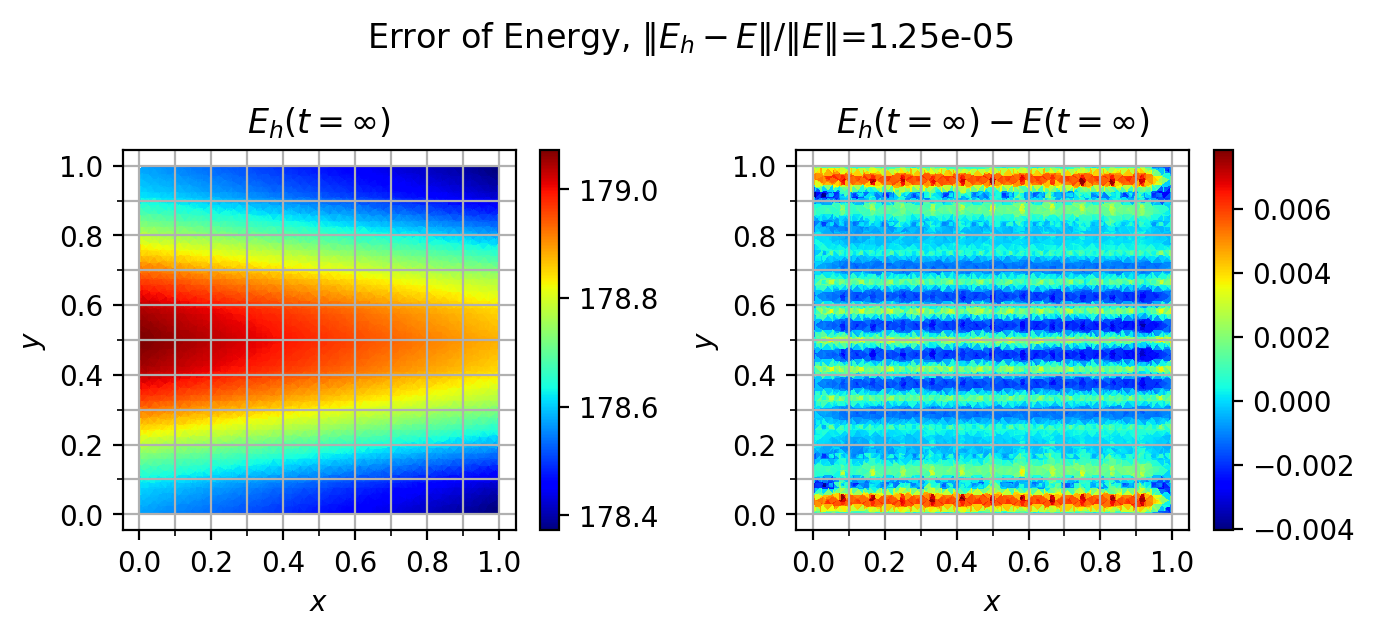

148.4421181678772 [3, 4, 5, 6, 8, 10, 12] [0.000203703, 0.000117203, 7.56837e-05, 5.24637e-05, 2.90897e-05, 1.83185e-05, 1.25419e-05]
[-1.92141127 -1.95992516 -2.00986278 -2.04996209 -2.07253438 -2.07784776]


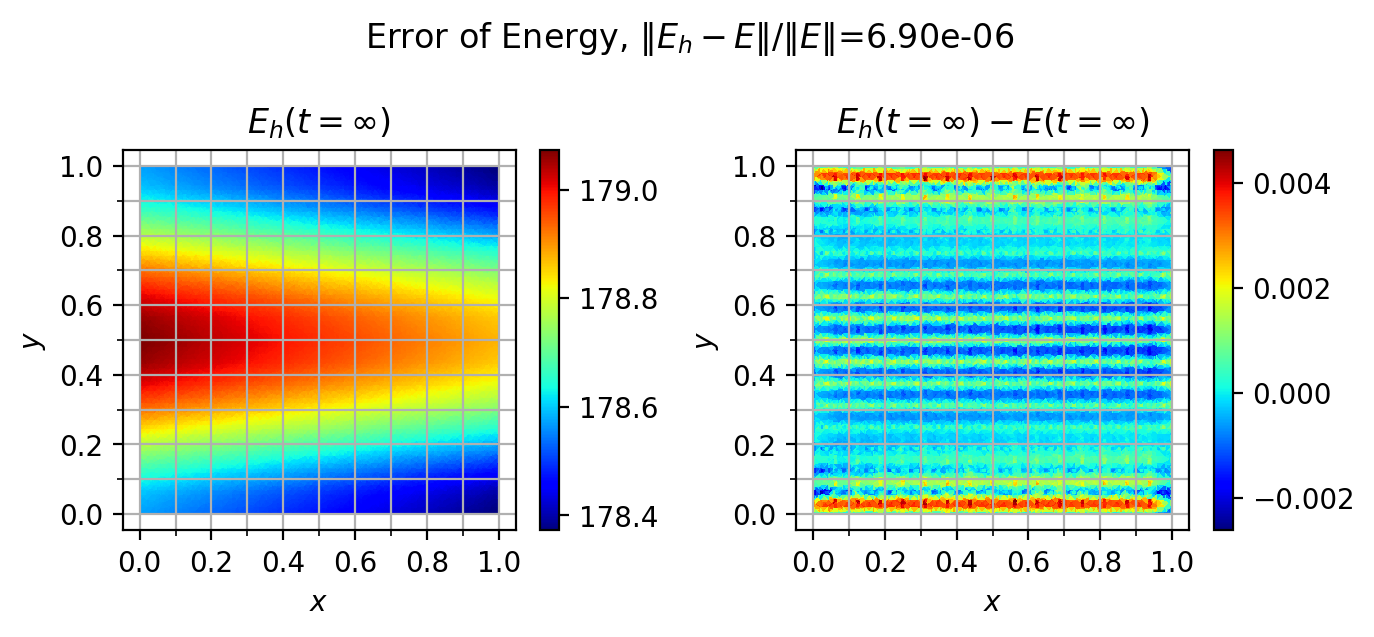

396.43179202079773 [3, 4, 5, 6, 8, 10, 12, 16] [0.000203703, 0.000117203, 7.56837e-05, 5.24637e-05, 2.90897e-05, 1.83185e-05, 1.25419e-05, 6.8981e-06]
[-1.92141127 -1.95992516 -2.00986278 -2.04996209 -2.07253438 -2.07784776
 -2.07808927]


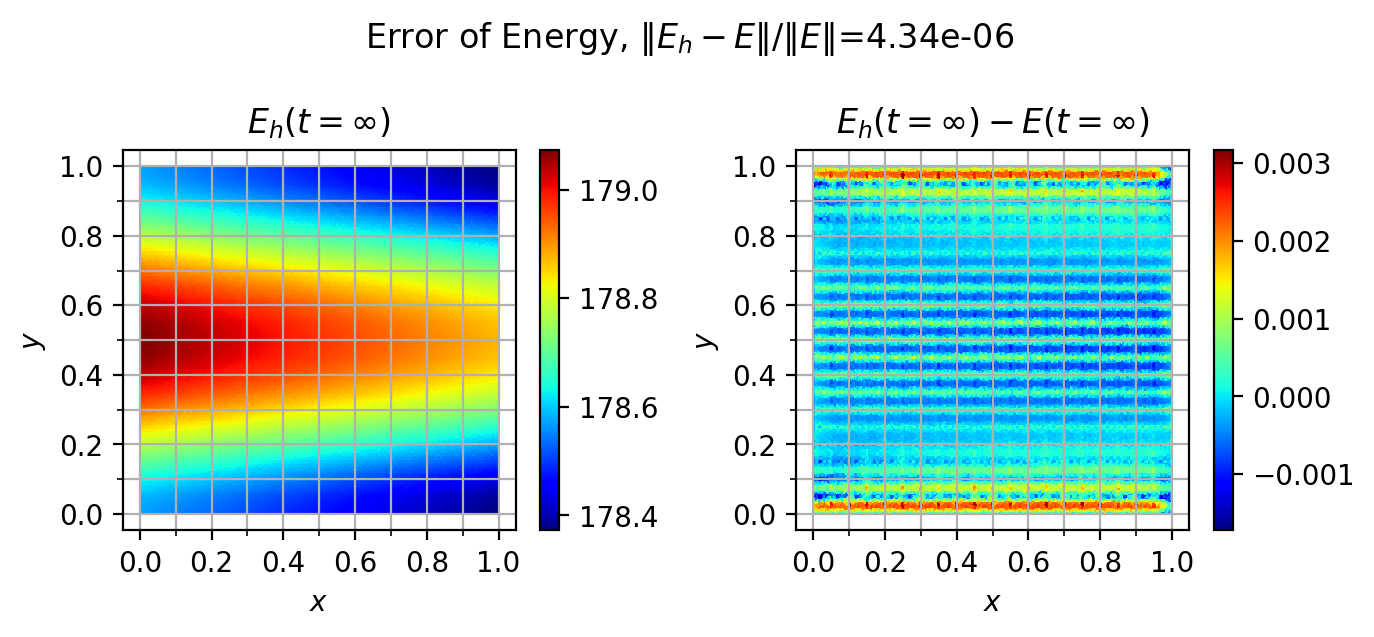

897.7414112091064 [3, 4, 5, 6, 8, 10, 12, 16, 20] [0.000203703, 0.000117203, 7.56837e-05, 5.24637e-05, 2.90897e-05, 1.83185e-05, 1.25419e-05, 6.8981e-06, 4.34184e-06]
[-1.92141127 -1.95992516 -2.00986278 -2.04996209 -2.07253438 -2.07784776
 -2.07808927 -2.07466354]


In [29]:
import subprocess
import time

start = time.time()
N_list = [3,4,5,6,8,10,12,16,20]
left = 0
right = len(N_list)
p = 1
for k,N in enumerate(N_list[left:right]):
    # 定义输出文件路径
    stdout_file = f"./logging_Diric4_{p}_{N}_rel1E8_stdout.txt"
    stderr_file = f"./logging_Diric4_{p}_{N}_rel1E8_stderr.txt"

    # 构造命令
    command = f"./PoiseuilleBatch3 {p} {N}"

    # 执行命令并捕获输出
    with open(stdout_file, "w") as out, open(stderr_file, "w") as err:
        process = subprocess.Popen(command, shell=True, stdout=out, stderr=err)
        process.wait()  # 等待进程完成


    draw(p,N)
    result = {}
    NN = []
    EE = []
    for N in N_list[:(left+k+1)]:
        # result[N] = read(stderr_file)
        NN.append(N)
        EE.append(np.loadtxt(f"./logging_Diric4_{p}_{N}_rel1E8_stdout.txt")[5])
    print(time.time()-start,NN,EE)
    if(len(NN)>1):
        print(np.diff(np.log(np.array(EE)))/np.diff(np.log(np.array(NN))))


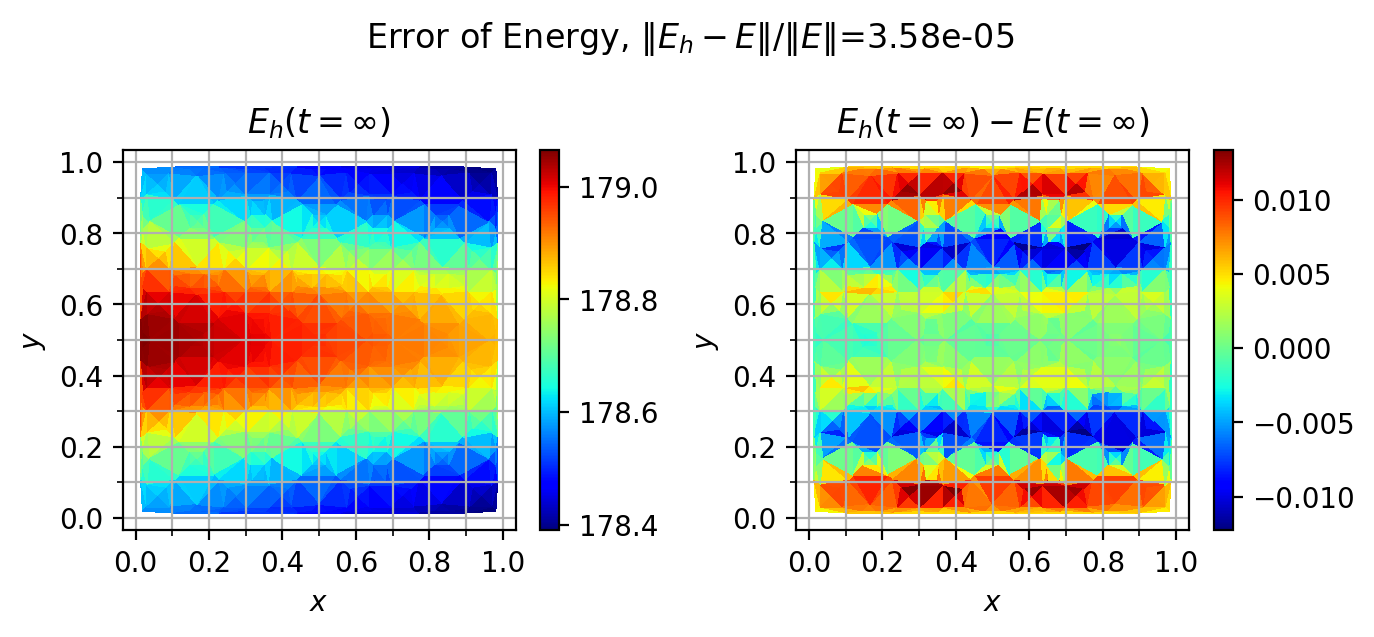

41.12341618537903 [3] [3.58153e-05]


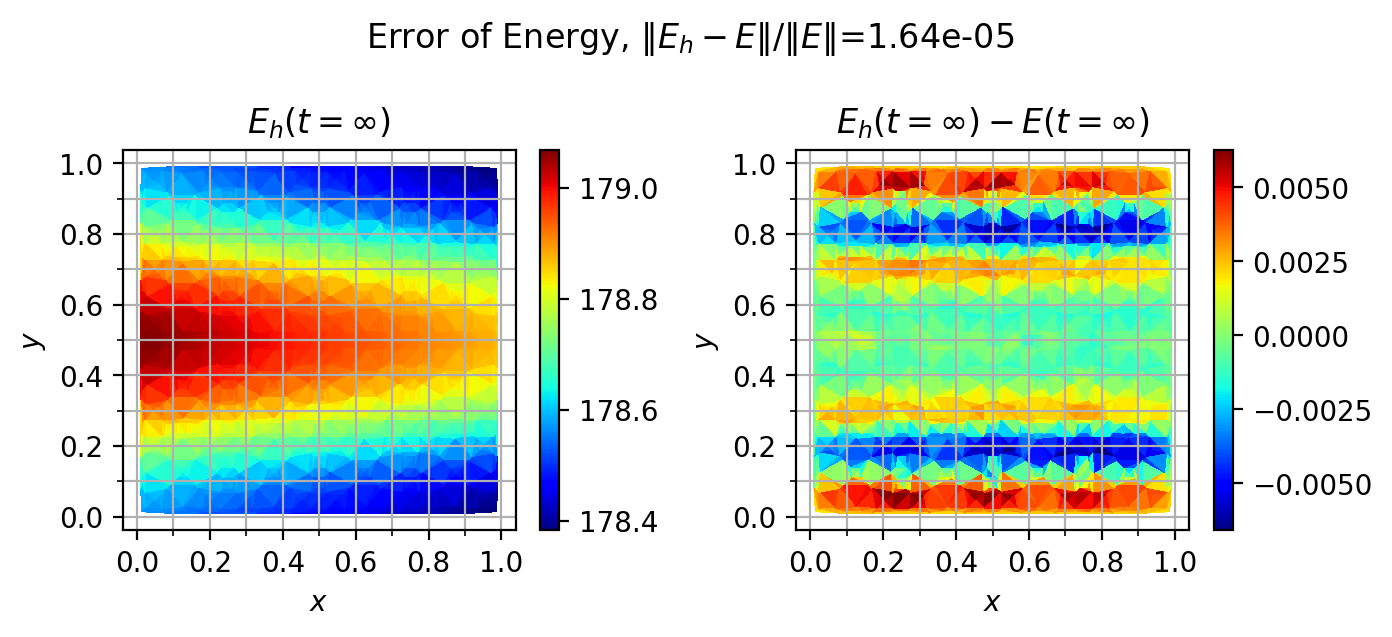

114.30371427536011 [3, 4] [3.58153e-05, 1.64081e-05]
[-2.71341226]


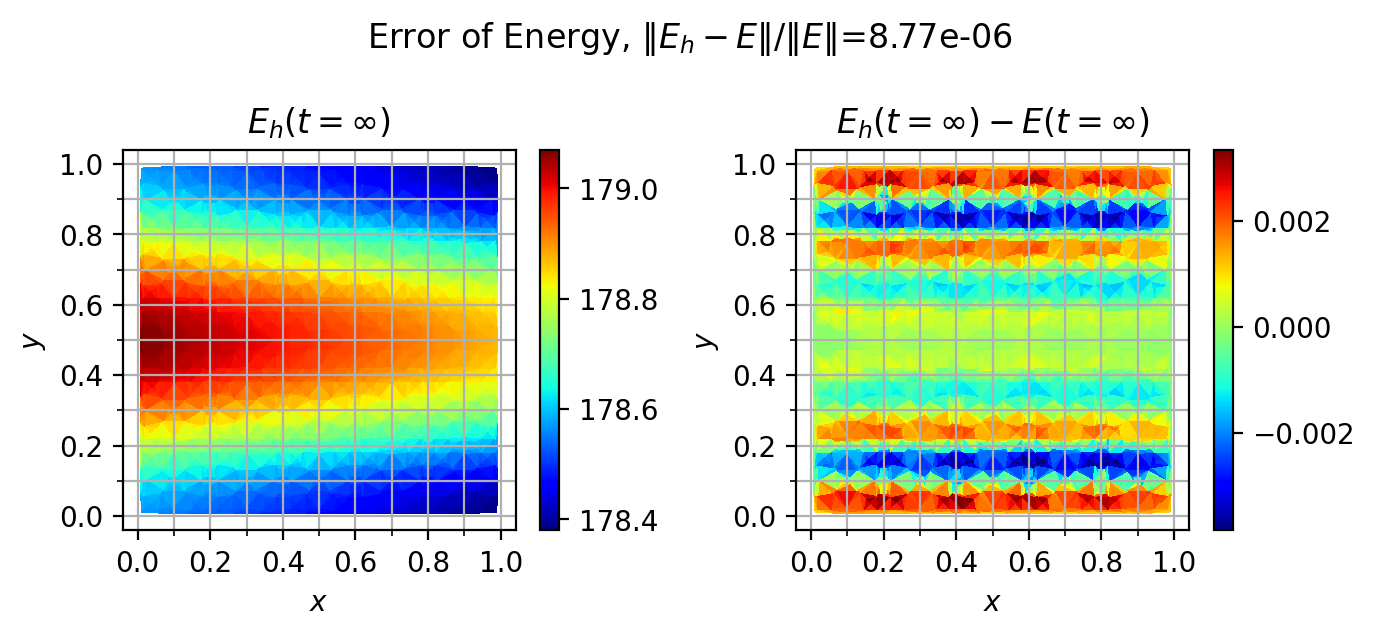

216.7617223262787 [3, 4, 5] [3.58153e-05, 1.64081e-05, 8.7661e-06]
[-2.71341226 -2.80932656]


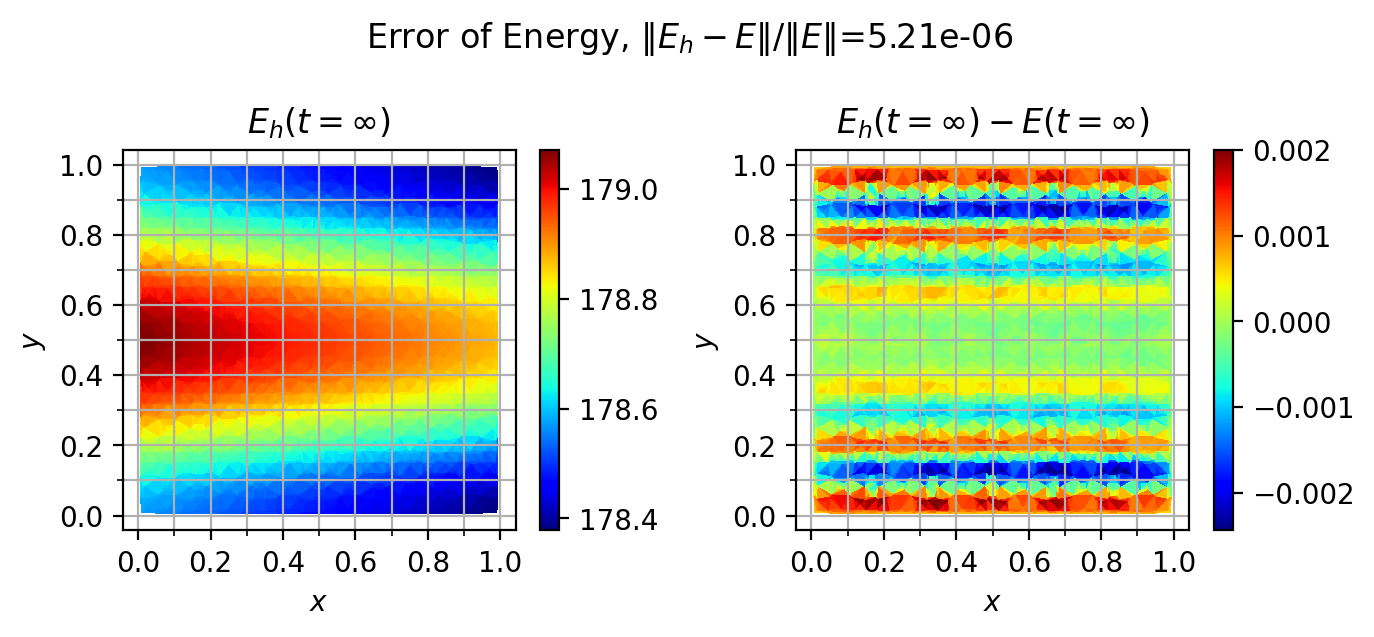

380.78810453414917 [3, 4, 5, 6] [3.58153e-05, 1.64081e-05, 8.7661e-06, 5.20683e-06]
[-2.71341226 -2.80932656 -2.8571541 ]


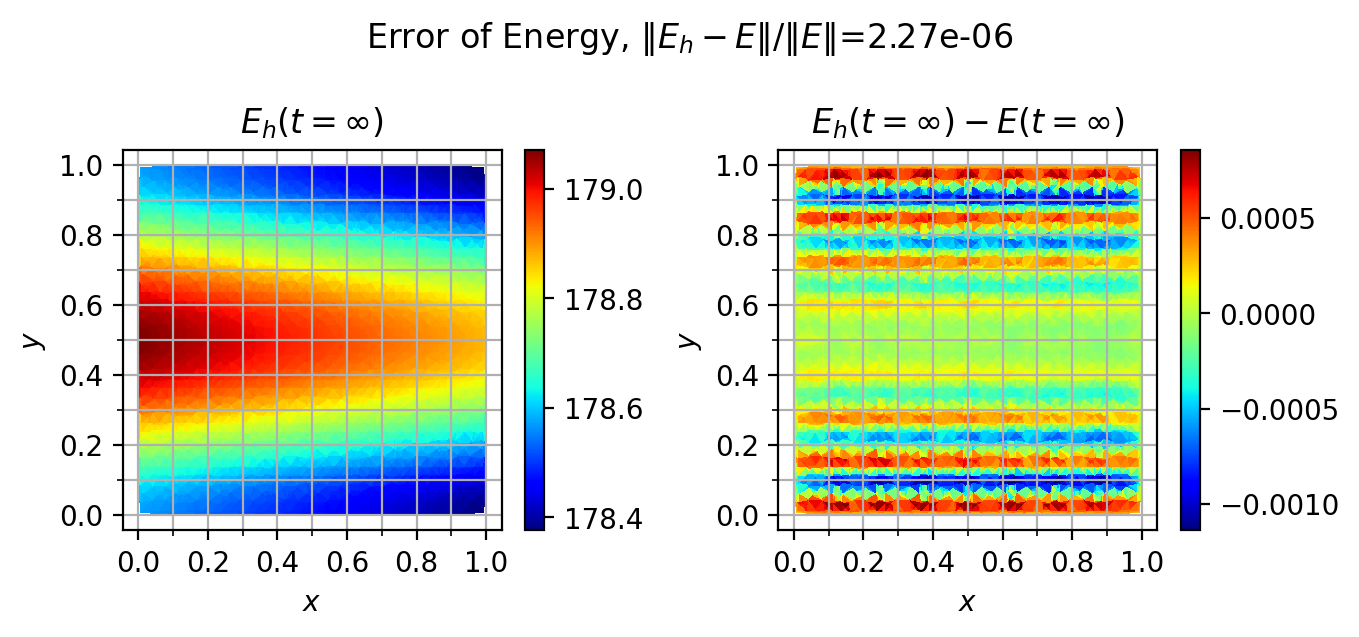

762.425000667572 [3, 4, 5, 6, 8] [3.58153e-05, 1.64081e-05, 8.7661e-06, 5.20683e-06, 2.26827e-06]
[-2.71341226 -2.80932656 -2.8571541  -2.88844484]


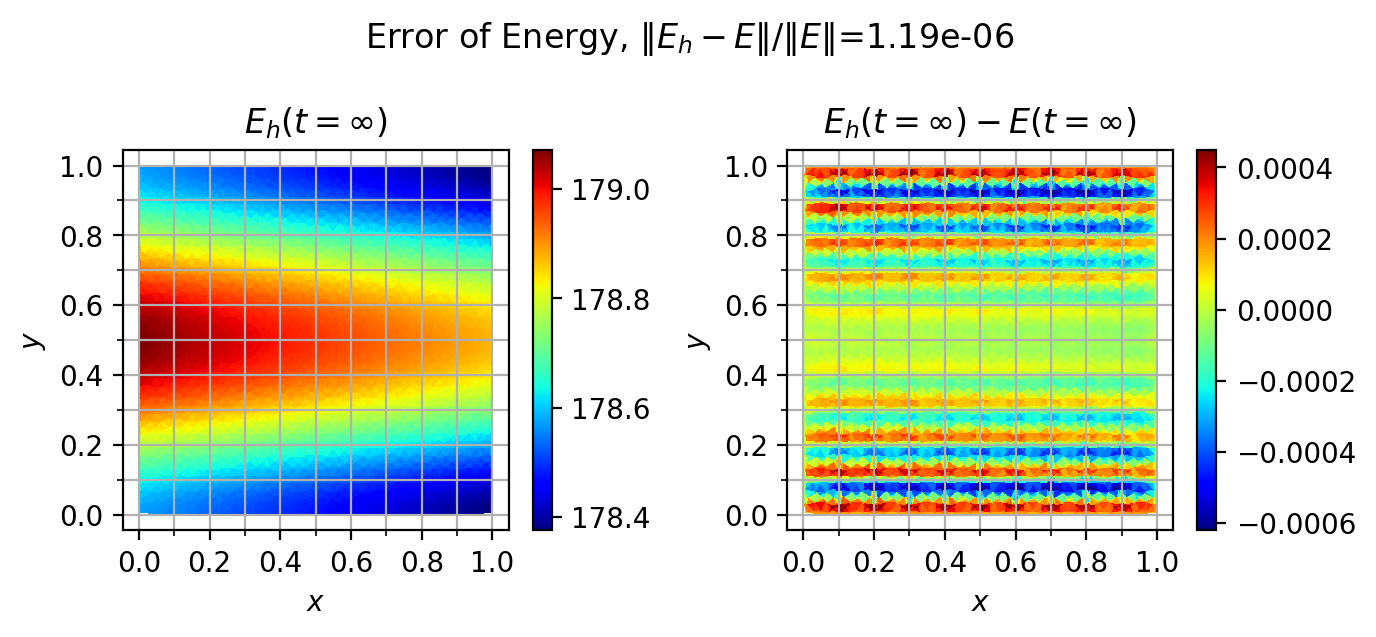

1658.237853527069 [3, 4, 5, 6, 8, 10] [3.58153e-05, 1.64081e-05, 8.7661e-06, 5.20683e-06, 2.26827e-06, 1.18827e-06]
[-2.71341226 -2.80932656 -2.8571541  -2.88844484 -2.89732307]


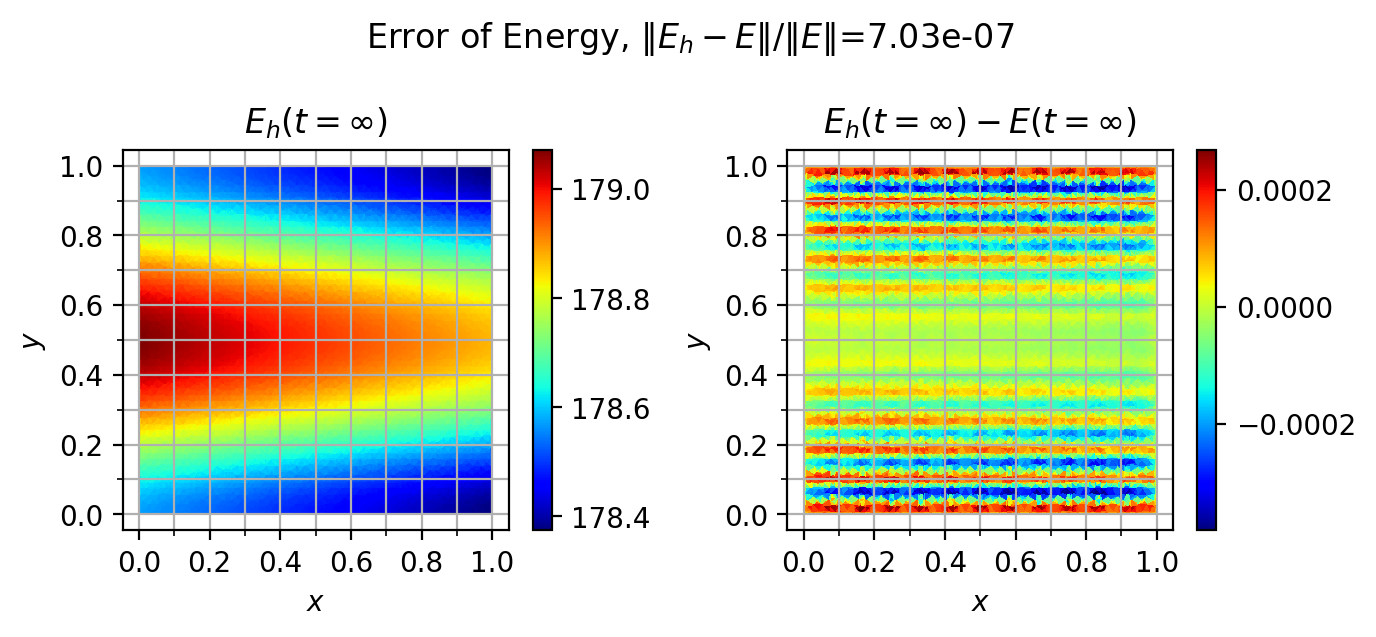

3664.955359697342 [3, 4, 5, 6, 8, 10, 12] [3.58153e-05, 1.64081e-05, 8.7661e-06, 5.20683e-06, 2.26827e-06, 1.18827e-06, 7.02694e-07]
[-2.71341226 -2.80932656 -2.8571541  -2.88844484 -2.89732307 -2.88135005]


KeyboardInterrupt: 

In [52]:
import subprocess
import time

start = time.time()
N_list = [3,4,5,6,8,10,12,16,20]
left = 0
right = len(N_list)
p = 2
for k,N in enumerate(N_list[left:right]):
    # 定义输出文件路径
    stdout_file = f"./logging_Diric4_{p}_{N}_rel1E8_stdout.txt"
    stderr_file = f"./logging_Diric4_{p}_{N}_rel1E8_stderr.txt"

    # 构造命令
    command = f"./PoiseuilleBatch3 {p} {N}"

    # 执行命令并捕获输出
    with open(stdout_file, "w") as out, open(stderr_file, "w") as err:
        process = subprocess.Popen(command, shell=True, stdout=out, stderr=err)
        process.wait()  # 等待进程完成


    draw(p,N)
    result = {}
    NN = []
    EE = []
    for N in N_list[:(left+k+1)]:
        # result[N] = read(stderr_file)
        NN.append(N)
        EE.append(np.loadtxt(f"./logging_Diric4_{p}_{N}_rel1E8_stdout.txt")[5])
    print(time.time()-start,NN,EE)
    if(len(NN)>1):
        print(np.diff(np.log(np.array(EE)))/np.diff(np.log(np.array(NN))))



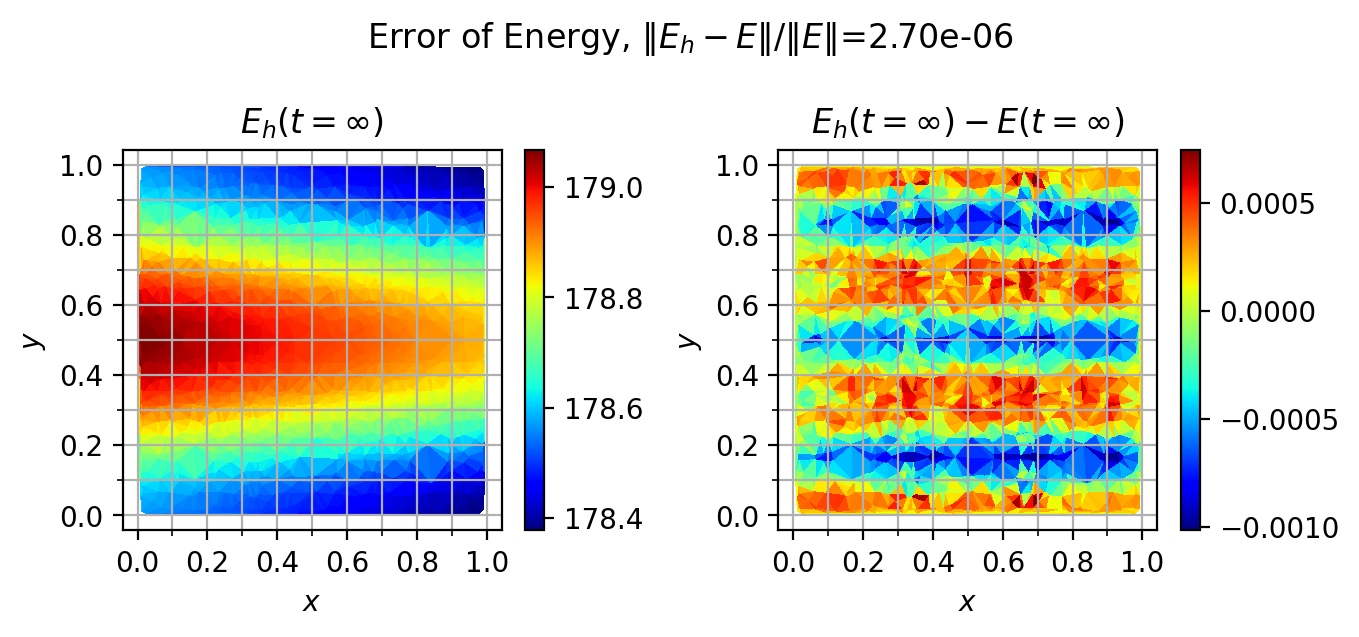

147.79189729690552 [3] [2.70054e-06]


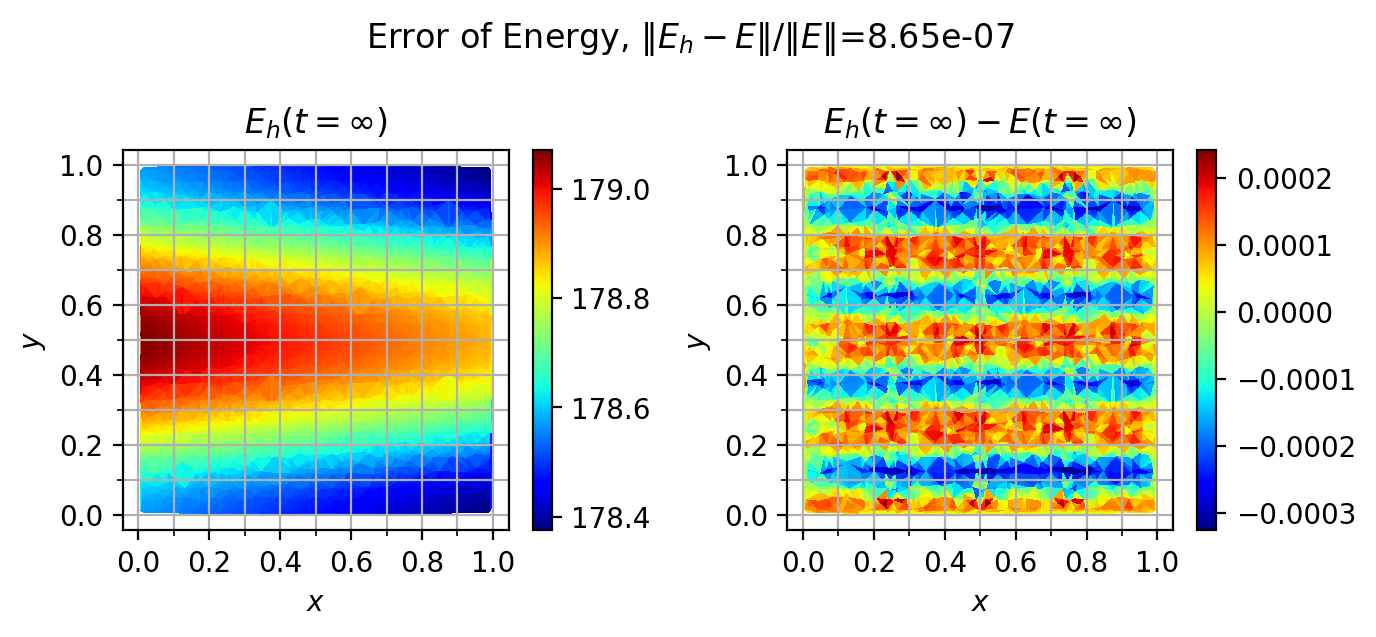

435.6954264640808 [3, 4] [2.70054e-06, 8.64939e-07]
[-3.95766075]


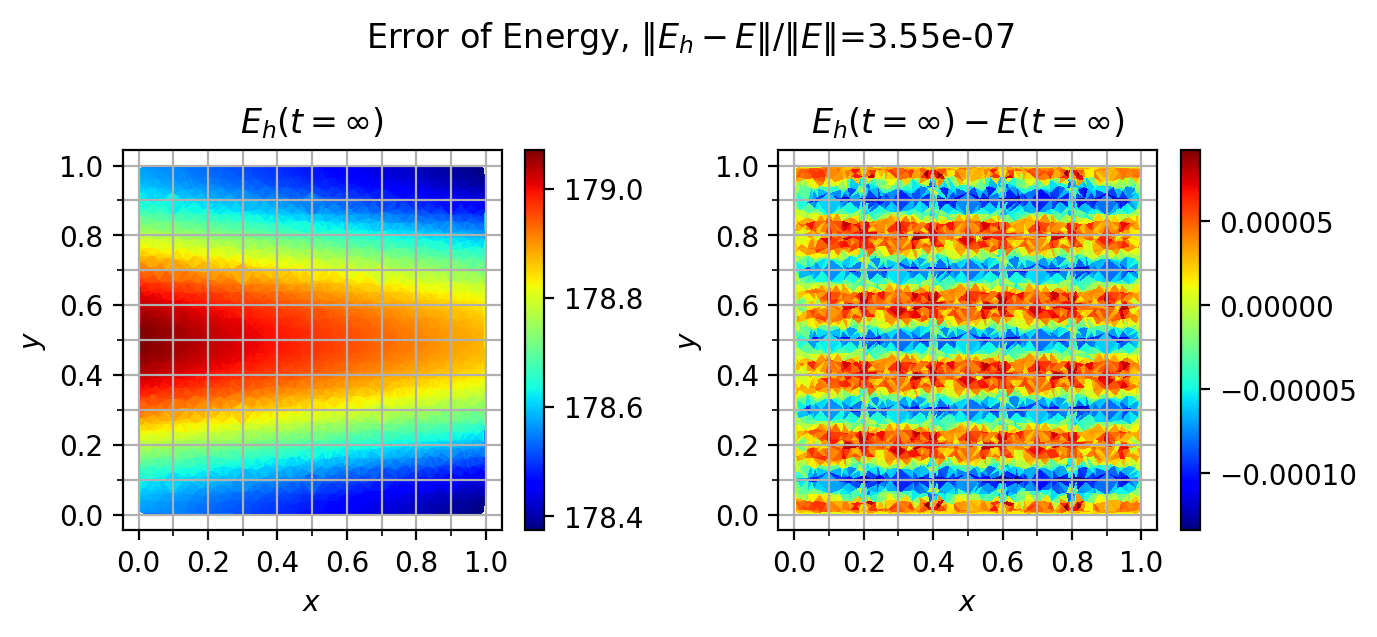

944.5390491485596 [3, 4, 5] [2.70054e-06, 8.64939e-07, 3.55343e-07]
[-3.95766075 -3.98656138]


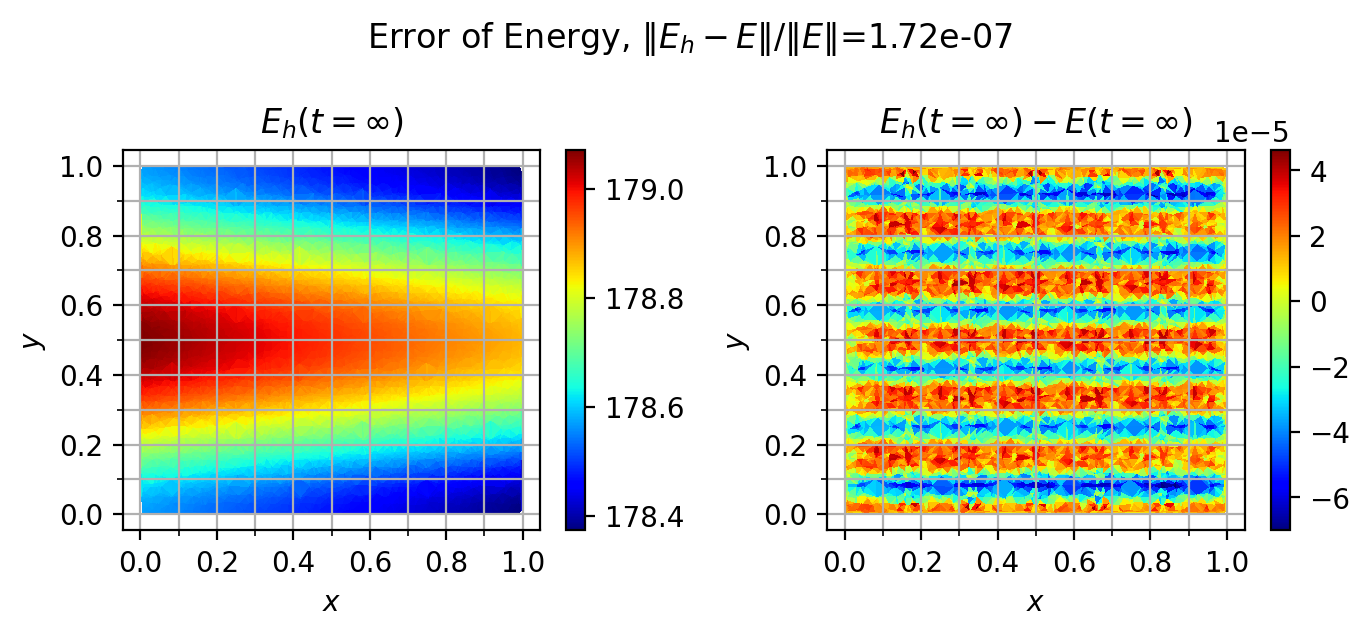

1829.8450675010681 [3, 4, 5, 6] [2.70054e-06, 8.64939e-07, 3.55343e-07, 1.7224e-07]
[-3.95766075 -3.98656138 -3.97207374]


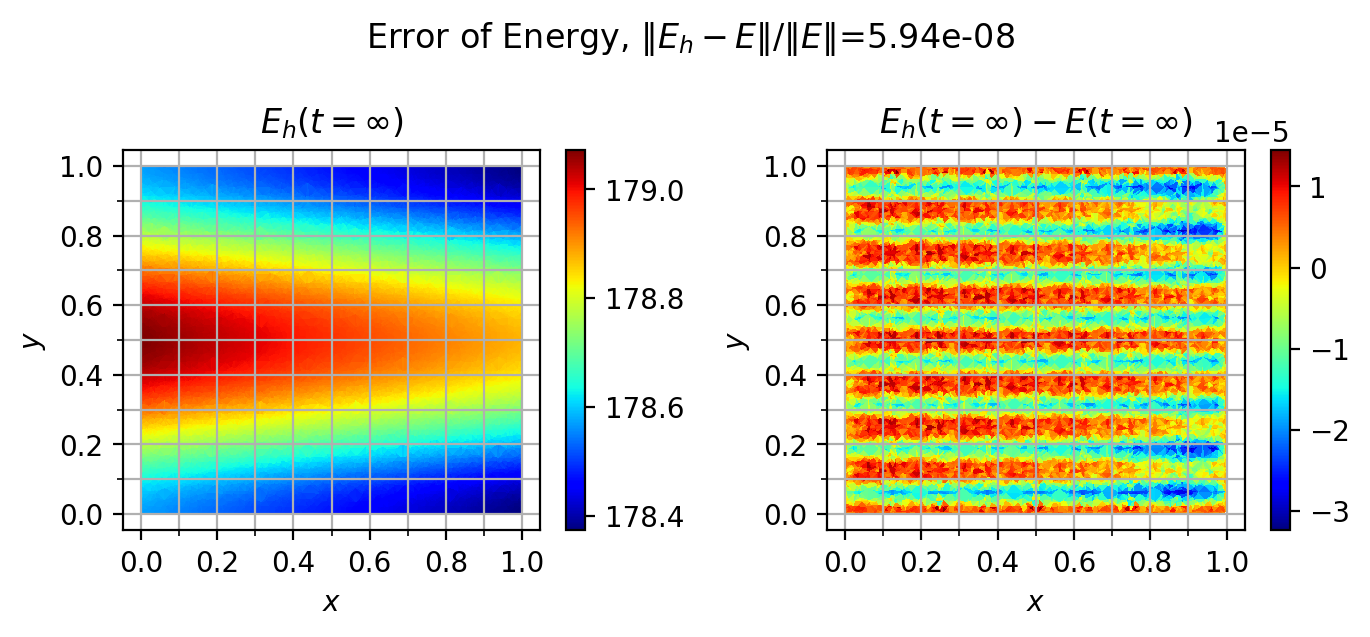

4075.6484689712524 [3, 4, 5, 6, 8] [2.70054e-06, 8.64939e-07, 3.55343e-07, 1.7224e-07, 5.93988e-08]
[-3.95766075 -3.98656138 -3.97207374 -3.70066449]


KeyboardInterrupt: 

In [53]:
import subprocess
import time

start = time.time()
N_list = [3,4,5,6,8,10,12,]
left = 0
right = len(N_list)
p = 3
for k,N in enumerate(N_list[left:right]):
    # 定义输出文件路径
    stdout_file = f"./logging_Diric4_{p}_{N}_rel1E8_stdout.txt"
    stderr_file = f"./logging_Diric4_{p}_{N}_rel1E8_stderr.txt"

    # 构造命令
    command = f"./PoiseuilleBatch3 {p} {N}"

    # 执行命令并捕获输出
    with open(stdout_file, "w") as out, open(stderr_file, "w") as err:
        process = subprocess.Popen(command, shell=True, stdout=out, stderr=err)
        process.wait()  # 等待进程完成


    draw(p,N)
    result = {}
    NN = []
    EE = []
    for N in N_list[:(left+k+1)]:
        # result[N] = read(stderr_file)
        NN.append(N)
        EE.append(np.loadtxt(f"./logging_Diric4_{p}_{N}_rel1E8_stdout.txt")[5])
    print(time.time()-start,NN,EE)
    if(len(NN)>1):
        print(np.diff(np.log(np.array(EE)))/np.diff(np.log(np.array(NN))))



In [ ]:
import subprocess
import time

start = time.time()
N_list = [3,4,5,6,8,]
left = 0
right = len(N_list)
p = 4
for k,N in enumerate(N_list[left:right]):
    # 定义输出文件路径
    stdout_file = f"./logging_Diric4_{p}_{N}_rel1E8_stdout.txt"
    stderr_file = f"./logging_Diric4_{p}_{N}_rel1E8_stderr.txt"

    # 构造命令
    command = f"./PoiseuilleBatch3 {p} {N}"

    # 执行命令并捕获输出
    with open(stdout_file, "w") as out, open(stderr_file, "w") as err:
        process = subprocess.Popen(command, shell=True, stdout=out, stderr=err)
        process.wait()  # 等待进程完成


    draw(p,N)
    result = {}
    NN = []
    EE = []
    for N in N_list[:(left+k+1)]:
        # result[N] = read(stderr_file)
        NN.append(N)
        EE.append(np.loadtxt(f"./logging_Diric4_{p}_{N}_rel1E8_stdout.txt")[5])
    print(time.time()-start,NN,EE)
    if(len(NN)>1):
        print(np.diff(np.log(np.array(EE)))/np.diff(np.log(np.array(NN))))



/tmp/ipykernel_6243/518606087.py:16: UserWarning: loadtxt: input contained no data: "./logging_Diric4_2_16_rel1E8_stdout.txt"
  data = np.loadtxt(filename)
/tmp/ipykernel_6243/518606087.py:16: UserWarning: loadtxt: input contained no data: "./logging_Diric4_3_10_rel1E8_stdout.txt"
  data = np.loadtxt(filename)


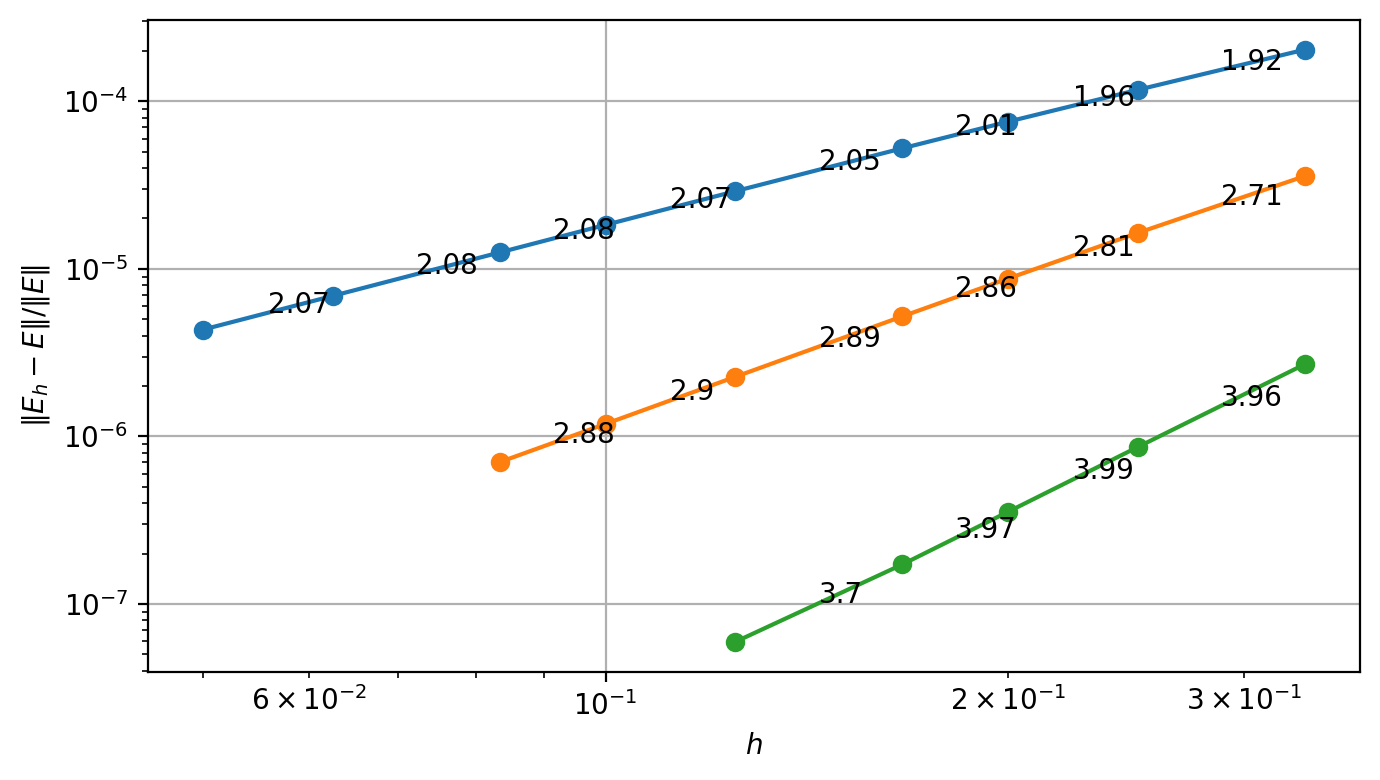

In [55]:
import numpy as np
import scipy 
import matplotlib as mlp
import matplotlib.pyplot as plt 
import os


plt.figure(figsize=(7,4),dpi=200)
for p in range(3):
    p = p+1
    NN = []
    EE = []
    for N in range(30):
        filename = f'./logging_Diric4_{p}_{N}_rel1E8_stdout.txt'
        if not os.path.exists(filename): continue
        data = np.loadtxt(filename)
        if(len(data)==0): continue
        err = data[5]
        NN.append(N)
        EE.append(err)
    h = 1/np.array(NN)
    error = np.array(EE)
    order = np.diff(np.log(error))/np.diff(np.log(h))
    plt.loglog(h,error,'o-',label='p=%d'%(p))
    gm = lambda x: (x[1:]*x[:-1])**0.5
    for x,y,o in zip(gm(h),gm(error),order):
        plt.text(x,y,o.round(2))
plt.grid()
plt.xlabel(r'$h$')
plt.ylabel(r'$\|E_h-E\|/\|E\|$')
plt.tight_layout()
plt.show()

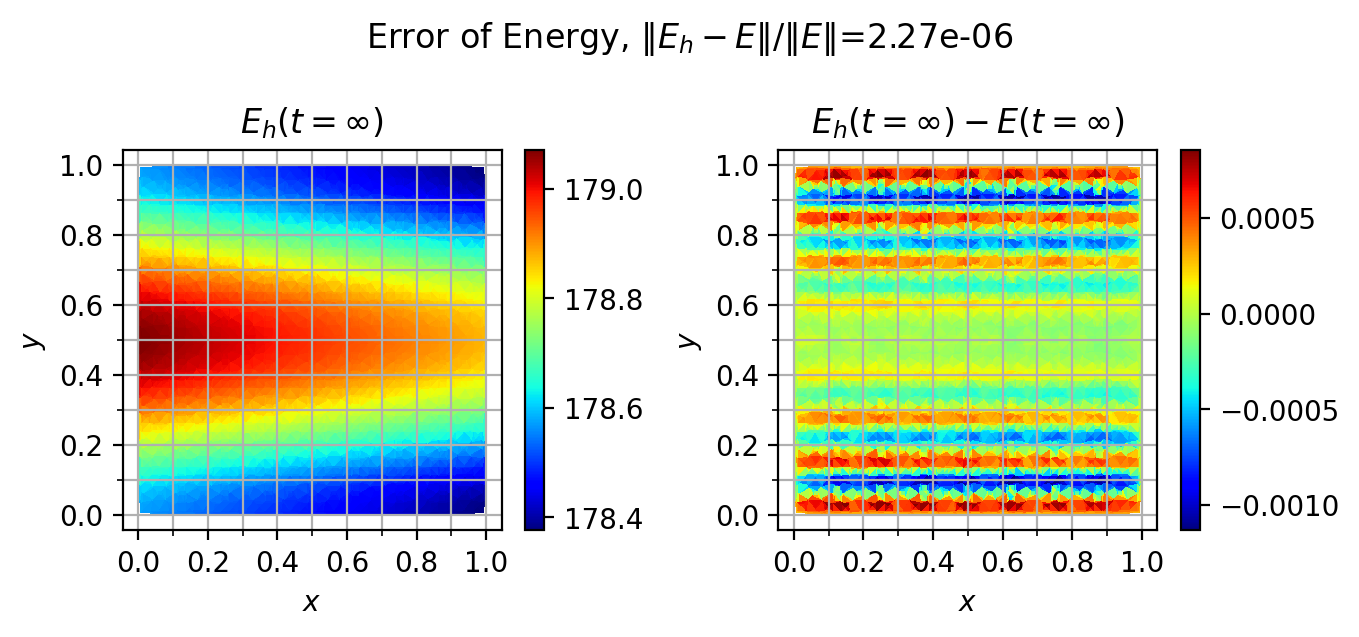

In [14]:
p = 2
N = 8
result_file = f'./Order_%d/rho_T_1_N_%d.txt'%(p,N)
rorder_file = f'./logging_Diric4_%d_%d_rel1E4_stdout.txt'%(p,N)
data = np.loadtxt(result_file)
x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = data.T

plt.figure(figsize=(7,3.2),dpi=200)

plt.subplot(1,2,1)
plt.tripcolor(x,y,eh,cmap='jet')
plt.colorbar()
plt.xticks(np.linspace(0,1,6))
plt.yticks(np.linspace(0,1,6))
plt.xticks(np.linspace(0,1,11),minor=True)
plt.yticks(np.linspace(0,1,11),minor=True)
plt.grid(which='both')
plt.title(r'$E_h(t=\infty)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.subplot(1,2,2)
plt.tripcolor(x,y,eh-es,cmap='jet')
plt.colorbar()
plt.xticks(np.linspace(0,1,6))
plt.yticks(np.linspace(0,1,6))
plt.xticks(np.linspace(0,1,11),minor=True)
plt.yticks(np.linspace(0,1,11),minor=True)
plt.grid(which='both')
plt.title(r'$E_h(t=\infty)-E(t=\infty)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.suptitle(r'Error of Energy, $\|E_h-E\|/\|E\|$=%.2e'%(
np.loadtxt(rorder_file)[5]))
plt.tight_layout()
plt.show()

In [56]:
for p in range(3):
    p = p+1
    NN = []
    EE = []
    for N in range(30):
        filename = f'./logging_Diric4_{p}_{N}_rel1E8_stdout.txt'
        if os.path.exists(filename): 
            os.rename(f'./logging_Diric4_{p}_{N}_rel1E8_stdout.txt',f'./logging_Diric4_{p}_{N}_NIP_1E8_stdout.txt')
            os.rename(f'./logging_Diric4_{p}_{N}_rel1E8_stderr.txt',f'./logging_Diric4_{p}_{N}_NIP_1E8_stderr.txt')
        